In [1]:
#Continue with this file as the first one is getting quite large

In [2]:
#import some libraries
import pandas as pd
import numpy as np

In [3]:
# read the student maths data set into a Dataframe called 'studentmat
studentmat = pd.read_csv('student-mat.csv')  
# read the student portuguese data into a Dataframe called 'studentport'
studentport = pd.read_csv('student-por.csv')  

In [4]:
# before we merge we need to add a column to each dataset to know what subject math or portuguese the 
# grades apply to
studentmat['subject'] = 'M'

In [5]:
# check the head to see it is added
studentmat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,M
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,M
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,M
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,M
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,M


In [6]:
studentport['subject'] = 'P'

In [7]:
# check the head to see it is added
studentport.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,P
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,P
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,P
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,P
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,P


In [8]:
# now merge
studentsall=pd.merge(studentmat, studentport, how='outer')

In [9]:
# check the head to see it is added
studentsall.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,M
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,M
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,M
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,M
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,M


In [10]:
studentsall.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,P
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,P
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,P
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,P
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,4,10,11,11,P


In [11]:
# how many records in the math data set
len(studentmat)

395

In [12]:
#how many records in the portuguese data set
len(studentport)

649

In [13]:
# double check the merge includes all the data should be 395 + 649=1044
len(studentsall)

1044

In [14]:
# Display the plots in the notebook with the following command
%matplotlib inline
# Import the graphing libraries we will use
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e597b00>]], dtype=object)

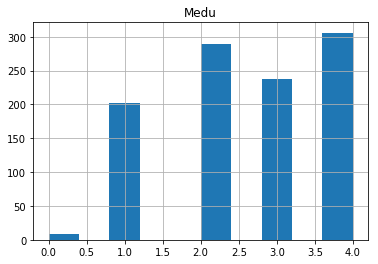

In [15]:
studentsall[['Medu']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110c7ada0>]], dtype=object)

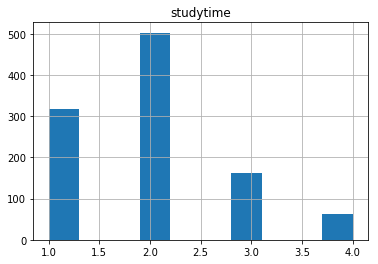

In [16]:
studentsall[['studytime']].hist()

In [17]:
# found these functions on kaggle so using them they look useful to see data values
def get_feature_lists_by_dtype(data):
    features = data.columns.tolist()
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

def show_uniques(data,features):
    for f in features:
        if len(data[f].unique()) < 30:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()))
        else:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()[0:10]))
def show_all_uniques(data):
    dtypes = get_feature_lists_by_dtype(data)
    for key in dtypes.keys():
        print(key + "\n")
        show_uniques(data,dtypes[key])
        print()

In [18]:
show_all_uniques(studentsall)

object

school: count(2) ['GP' 'MS']
sex: count(2) ['F' 'M']
address: count(2) ['U' 'R']
famsize: count(2) ['GT3' 'LE3']
Pstatus: count(2) ['A' 'T']
Mjob: count(5) ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: count(5) ['teacher' 'other' 'services' 'health' 'at_home']
reason: count(4) ['course' 'other' 'home' 'reputation']
guardian: count(3) ['mother' 'father' 'other']
schoolsup: count(2) ['yes' 'no']
famsup: count(2) ['no' 'yes']
paid: count(2) ['no' 'yes']
activities: count(2) ['no' 'yes']
nursery: count(2) ['yes' 'no']
higher: count(2) ['yes' 'no']
internet: count(2) ['no' 'yes']
romantic: count(2) ['no' 'yes']
subject: count(2) ['M' 'P']

int64

age: count(8) [18 17 15 16 19 22 20 21]
Medu: count(5) [4 1 3 2 0]
Fedu: count(5) [4 1 2 3 0]
traveltime: count(4) [2 1 3 4]
studytime: count(4) [2 3 1 4]
failures: count(4) [0 3 2 1]
famrel: count(5) [4 5 3 1 2]
freetime: count(5) [3 2 4 1 5]
goout: count(5) [4 3 2 1 5]
Dalc: count(5) [1 2 5 3 4]
Walc: count(5) [1 3 2 4 5]
health

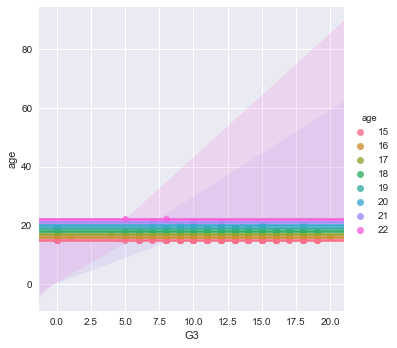

In [19]:
#try a scatter plot
import seaborn as sns
sns.set(color_codes=True)
# Draw a Scatterplot showing G1 and studytime
sns.lmplot(x='G3', y="age", hue="age", data=studentsall, fit_reg=True)

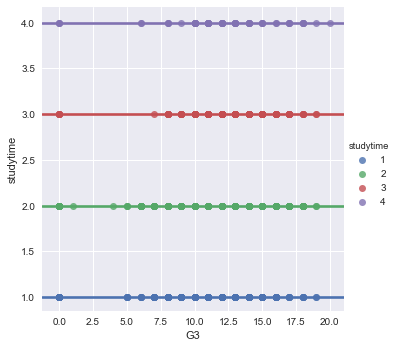

In [20]:
#try a scatter plot
import seaborn as sns
sns.set(color_codes=True)
# Draw a Scatterplot showing G1 and studytime
sns.lmplot(x='G3', y="studytime", hue="studytime", data=studentsall, fit_reg=True)

In [21]:
# Now I am going to convert the rest of the strings to numerics so I can take a look
students_with_dummies2 = pd.get_dummies(data=studentsall, columns = ['sex', 'school','activities','romantic','address', 'schoolsup','famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'internet','subject','paid'], prefix = ['sex', 'school','activies','romantic','address', 'schoolsup','famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'internet','subject','paid'] )
students_with_dummies2.head()

,age,Medu,Fedu,reason,traveltime,studytime,failures,famsup,nursery,higher,...,Fjob_teacher,guardian_father,guardian_mother,guardian_other,internet_no,internet_yes,subject_M,subject_P,paid_no,paid_yes
0,18,4,4,course,2,2,0,no,yes,yes,...,1,0,1,0,1,0,1,0,1,0
1,17,1,1,course,1,2,0,yes,no,yes,...,0,1,0,0,0,1,1,0,1,0
2,15,1,1,other,1,2,3,no,yes,yes,...,0,0,1,0,0,1,1,0,0,1
3,15,4,2,home,1,3,0,yes,yes,yes,...,0,0,1,0,0,1,1,0,0,1
4,16,3,3,home,1,2,0,yes,yes,yes,...,0,1,0,0,1,0,1,0,0,1


In [22]:
students_with_dummies2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_teacher,guardian_father,guardian_mother,guardian_other,internet_no,internet_yes,subject_M,subject_P,paid_no,paid_yes
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,...,0.062261,0.232759,0.697318,0.069923,0.207854,0.792146,0.378352,0.621648,0.789272,0.210728
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,...,0.241744,0.422792,0.459639,0.255140,0.405967,0.405967,0.485209,0.485209,0.408021,0.408021
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
len(students_with_dummies2)

1044

In [24]:
len(students_with_dummies2.columns)

55

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_teacher,guardian_father,guardian_mother,guardian_other,internet_no,internet_yes,subject_M,subject_P,paid_no,paid_yes
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,...,-0.061390,-0.126978,-0.081701,0.357601,0.033229,-0.033229,-0.018790,0.018790,0.027917,-0.027917
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,...,0.260111,-0.043620,0.097703,-0.103730,-0.249728,0.249728,0.101246,-0.101246,-0.161349,0.161349
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,...,0.348978,0.094286,-0.046298,-0.072834,-0.170012,0.170012,0.094795,-0.094795,-0.118897,0.118897
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,...,-0.021649,0.024526,-0.061961,0.070983,0.169485,-0.169485,-0.079881,0.079881,0.083679,-0.083679
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,...,-0.033607,0.011457,-0.020958,0.018770,-0.049695,0.049695,0.060934,-0.060934,-0.105704,0.105704
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,...,-0.073646,-0.059589,-0.090476,0.261738,0.074263,-0.074263,0.083043,-0.083043,0.036389,-0.036389
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,...,-0.054509,0.008734,0.003844,-0.021398,-0.065972,0.065972,0.007091,-0.007091,-0.015404,0.015404
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,...,0.003558,-0.032711,0.003161,0.048511,-0.061016,0.061016,0.025949,-0.025949,0.034747,-0.034747
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,...,-0.031480,-0.064810,0.056714,0.005225,-0.083766,0.083766,-0.032011,0.032011,0.012943,-0.012943
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,...,-0.013600,0.034565,-0.077368,0.082103,-0.039511,0.039511,-0.011335,0.011335,-0.041919,0.041919


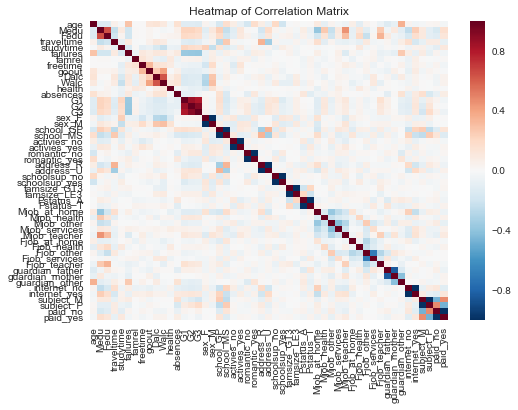

In [25]:
# now time to do something with the data
#Plot a Correlation Matrix
corr = students_with_dummies2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

In [26]:
#Extract ''G3'' column, because 'G3' is our target value
corr_left = pd.DataFrame(corr['G3'].drop('G3'))
corr_left.sort_values(by = 'G3', ascending = False)

,G3
G2,0.910743
G1,0.809142
Medu,0.201472
subject_P,0.187166
studytime,0.161629
Fedu,0.159796
school_GP,0.127114
address_U,0.117696
internet_yes,0.107064
Fjob_teacher,0.101361


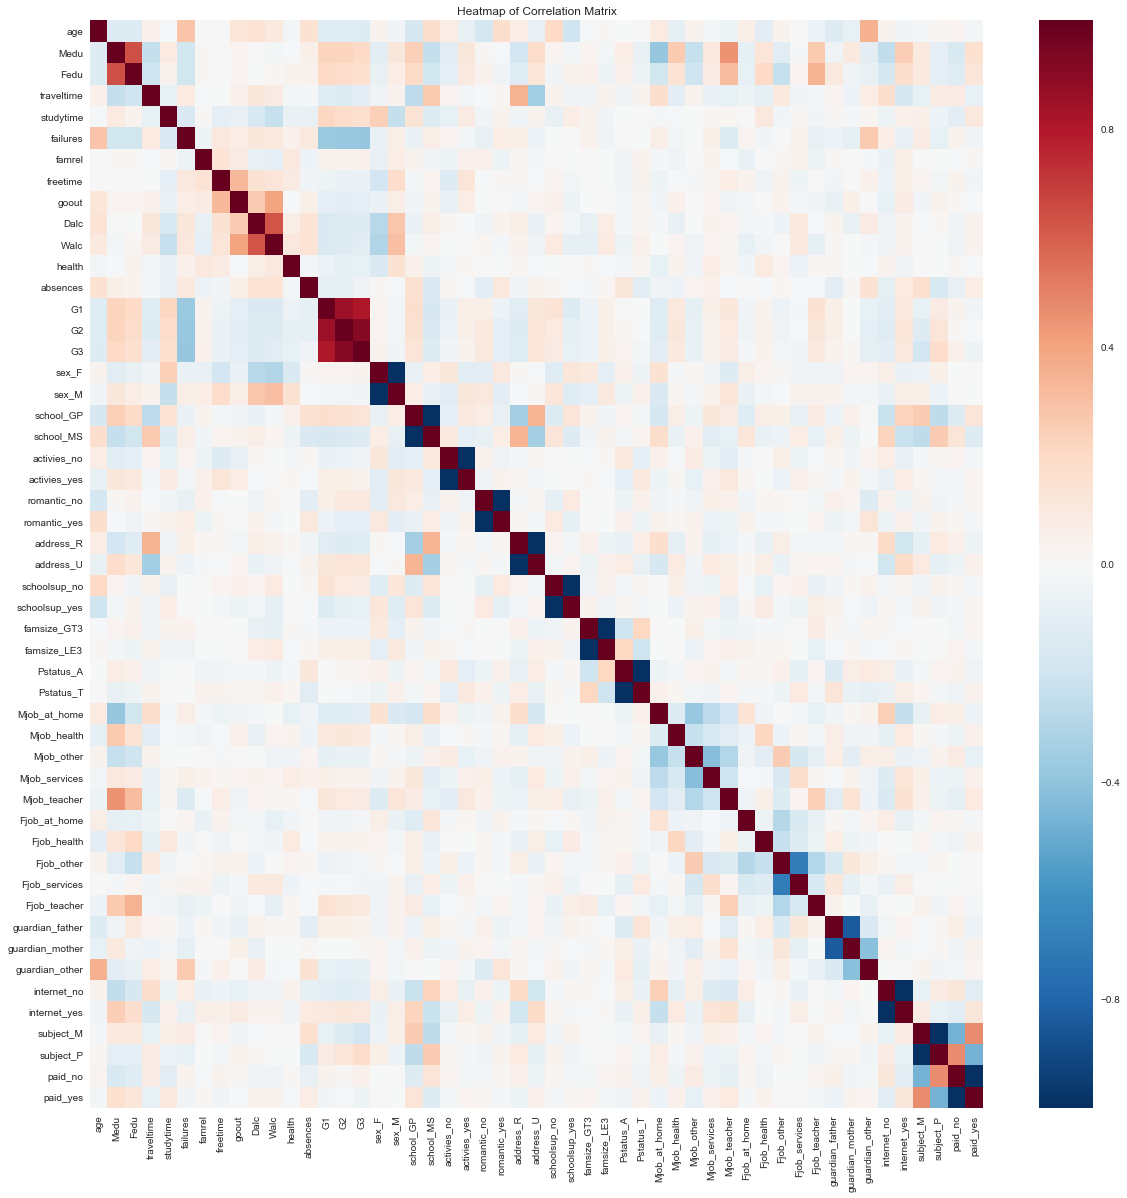

In [27]:
# larger view
# Let's make that plot a bit larger
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

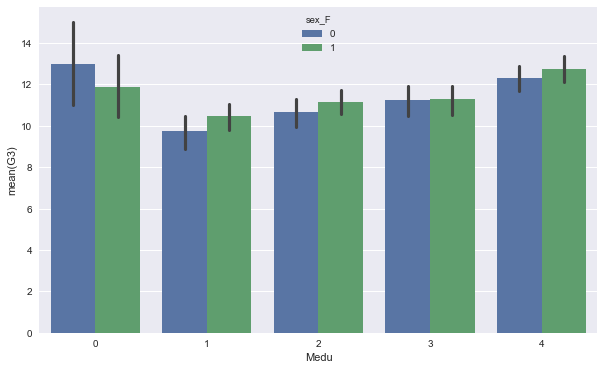

In [28]:
# if you xx
plt.figure(figsize = (10,6))
sns.barplot(x='Medu', y = 'G3', hue = 'sex_F', data = students_with_dummies2)

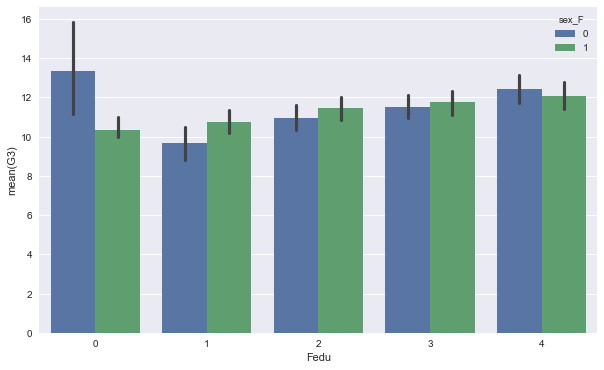

In [29]:
# take a look at father's education
plt.figure(figsize = (10,6))
sns.barplot(x='Fedu', y = 'G3', hue = 'sex_F', data = students_with_dummies2)

In [30]:
import pandas_profiling
pandas_profiling.ProfileReport(students_with_dummies2)

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Number of variables,55
Number of observations,1044
Total Missing (%),0.0%
Total size in memory,207.0 KiB
Average record size in memory,203.0 B
Numeric,50
Categorical,4
Date,0
Text (Unique),0
Rejected,1
Distinct count,5


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_teacher,guardian_father,guardian_mother,guardian_other,internet_no,internet_yes,subject_M,subject_P,paid_no,paid_yes
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,...,-0.061390,-0.126978,-0.081701,0.357601,0.033229,-0.033229,-0.018790,0.018790,0.027917,-0.027917
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,...,0.260111,-0.043620,0.097703,-0.103730,-0.249728,0.249728,0.101246,-0.101246,-0.161349,0.161349
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,...,0.348978,0.094286,-0.046298,-0.072834,-0.170012,0.170012,0.094795,-0.094795,-0.118897,0.118897
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,...,-0.021649,0.024526,-0.061961,0.070983,0.169485,-0.169485,-0.079881,0.079881,0.083679,-0.083679
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,...,-0.033607,0.011457,-0.020958,0.018770,-0.049695,0.049695,0.060934,-0.060934,-0.105704,0.105704
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,...,-0.073646,-0.059589,-0.090476,0.261738,0.074263,-0.074263,0.083043,-0.083043,0.036389,-0.036389
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,...,-0.054509,0.008734,0.003844,-0.021398,-0.065972,0.065972,0.007091,-0.007091,-0.015404,0.015404
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,...,0.003558,-0.032711,0.003161,0.048511,-0.061016,0.061016,0.025949,-0.025949,0.034747,-0.034747
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,...,-0.031480,-0.064810,0.056714,0.005225,-0.083766,0.083766,-0.032011,0.032011,0.012943,-0.012943
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,...,-0.013600,0.034565,-0.077368,0.082103,-0.039511,0.039511,-0.011335,0.011335,-0.041919,0.041919


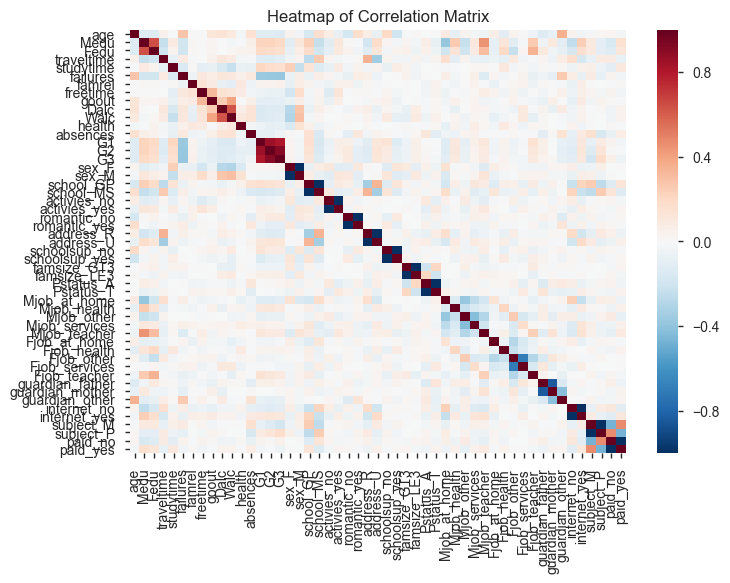

In [31]:
# now time to do something with the data
#Plot a Correlation Matrix for dummies2 with more categorical converted to numeric values
corr = students_with_dummies2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

In [32]:
# Plot each variable against each other 
# scroll down past the subplot information
# this allows plots to appear directly in the notebook
%matplotlib inline
import statsmodels.formula.api as smf
#pd.scatter_matrix(students_with_dummies2, figsize=(15,15))

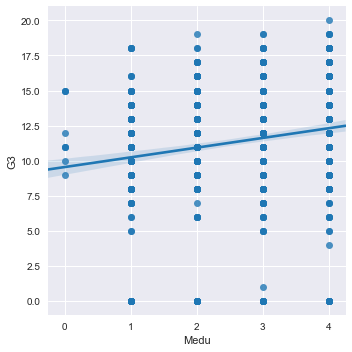

In [33]:
# check the distribution of final grade G3 vs. Medu using a scatterplot
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(y='G3', x='Medu', data=students_with_dummies2)

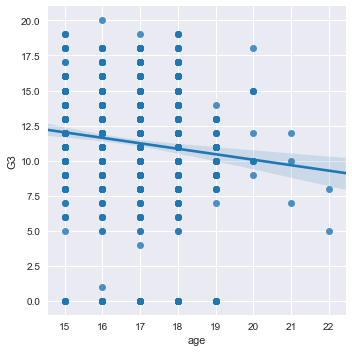

In [34]:
# check the distribution of final grade G3 vs. Medu using a scatterplot
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(y='G3', x='age', data=students_with_dummies2)

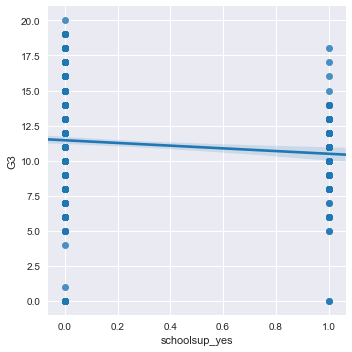

In [34]:
# check the distribution of final grade G3 vs. Medu using a scatterplot
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(y='G3', x='schoolsup_yes', data=students_with_dummies2)

In [35]:
?smf.ols

In [36]:
# create a fitted model in one line
#lm = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()
lm = smf.ols(formula='G3 ~ Medu + studytime', data=students_with_dummies2).fit()
# print the coefficients!
lm.params

Intercept    8.337707
Medu         0.647183
studytime    0.669611
dtype: float64

In [37]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     34.00
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           4.97e-15
Time:                        17:51:43   Log-Likelihood:                -2859.2
No. Observations:                1044   AIC:                             5724.
Df Residuals:                    1041   BIC:                             5739.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.3377      0.385     21.638      0.000         7.582     9.094
Medu           0.6472      0.104      6.247      0.000         0.444     0.850
studytime      0.6696      0.140      4.794      0.000         0.396     0.944
==============================================================================
Omnibus:                      198.228   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.648
Skew:                          -1.108   Prob(JB):                     6.66e-85
Kurtosis:                       5.001   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# create a fitted model in one line
#lm = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()
lm = smf.ols(formula='G3 ~ Medu + paid', data=students_with_dummies2).fit()
# print the coefficients!
lm.params

PatsyError: Error evaluating factor: NameError: name 'paid' is not defined
    G3 ~ Medu + paid
                ^^^^

In [ ]:
lm.summary()

In [ ]:
# create a fitted model in one line
#lm = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()
lm = smf.ols(formula='G3 ~ Medu + paid + Mjob_teacher', data=students_with_dummies2).fit()
# print the coefficients!
lm.params

In [ ]:
# I need to go back and understand what the values mean, intercept ..r squared closer 1, p value

In [ ]:
#would like to see the average grade for G3
#students_with_dummies2.G3.avg()
np.mean(students_with_dummies2.G3)

In [ ]:
#go back to this one
# create a fitted model in one line
#lm = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()
lm = smf.ols(formula='G3 ~ Medu', data=students_with_dummies2).fit()
# print the coefficients!
lm.params

In [ ]:
# create a DataFrame with the minimum and maximum values of Medu
# these values will be be used in the built model to predict the grade
X_new = pd.DataFrame({'Medu': [students_with_dummies2.Medu.min(), students_with_dummies2.Medu.max()]})
X_new.head()

In [ ]:
# predict grade given two data points and the built model

preds = lm.predict(X_new)
preds

Now lets view a line representing the model build off just Mother's education', over a scatter plot of 
the data of Grade

To produce the line overlay, we will simply plot a straight line between the two predicted points over the scatter plot. 

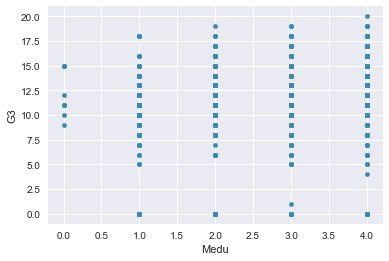

In [39]:
# first, plot the observed data
students_with_dummies2.plot(kind='scatter', x='Medu', y='G3')

NameError: name 'X_new' is not defined

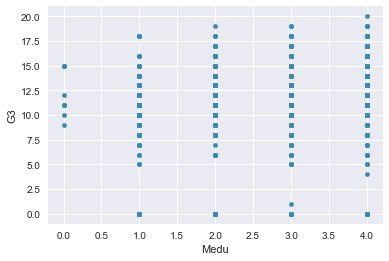

In [40]:
# Now, plot a line over the points that uses just the two points
students_with_dummies2.plot(kind='scatter', x='Medu', y='G3')
# this code overlays a straight line between the the coordinates created by X_new and preds
plt.plot(X_new, preds, c='red', linewidth=2)

In [41]:
# Now, plot a line over the points that uses just the two points
#students_with_dummies2.plot(kind='scatter', x='schoolsup', y='G3')
# this code overlays a straight line between the the coordinates created by X_new and preds
#plt.plot(X_new, preds, c='red', linewidth=2)

In [42]:
# not good up there maybe create training data and run

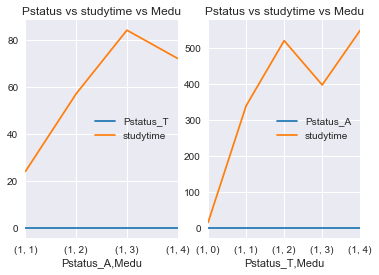

In [43]:
## lets focus over support for education now from parents / school
## using Pstatus field here to show impact of this over performance
## Pstatus = A indicates
## Pstatus = T indicates

fig, ax = plt.subplots(1, 2)

student_df = students_with_dummies2[['Pstatus_A', 'Pstatus_T','studytime','Medu']]
student_df_A = student_df[student_df['Pstatus_A'] == 1]
student_df_A.groupby(['Pstatus_A', 'Medu']).sum().plot(ax=ax[0], title="Pstatus vs studytime vs Medu")

student_df_T = student_df[student_df['Pstatus_T'] == 1]
student_df_T.groupby(['Pstatus_T', 'Medu']).sum().plot(ax=ax[1], title="Pstatus vs studytime vs Medu")

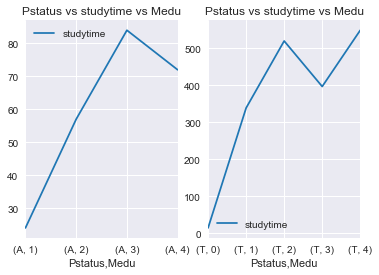

In [44]:
# maybe go back to non dummies data and try
fig, ax = plt.subplots(1, 2)

student_df = studentsall[['Pstatus','studytime','Medu']]
student_df_A = student_df[student_df['Pstatus'] == 'A']
student_df_A.groupby(['Pstatus', 'Medu']).sum().plot(ax=ax[0], title="Pstatus vs studytime vs Medu")

student_df_T = student_df[student_df['Pstatus'] == 'T']
student_df_T.groupby(['Pstatus', 'Medu']).sum().plot(ax=ax[1], title="Pstatus vs studytime vs Medu")

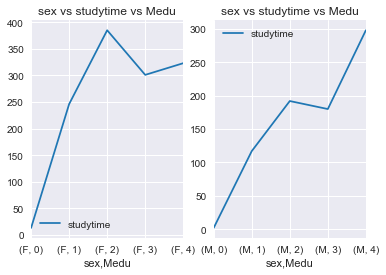

In [45]:
# maybe go back to non dummies data and try
fig, ax = plt.subplots(1, 2)

student_df = studentsall[['sex','studytime','Medu']]
student_df_F = student_df[student_df['sex'] == 'F']
student_df_F.groupby(['sex', 'Medu']).sum().plot(ax=ax[0], title="sex vs studytime vs Medu")

student_df_T = student_df[student_df['sex'] == 'M']
student_df_T.groupby(['sex', 'Medu']).sum().plot(ax=ax[1], title="sex vs studytime vs Medu")

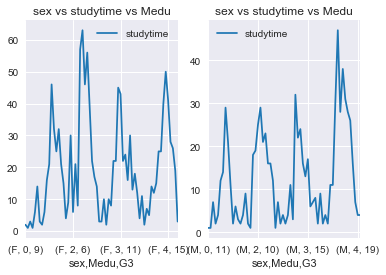

In [46]:
# maybe go back to non dummies data and try
fig, ax = plt.subplots(1, 2)

student_df = studentsall[['sex','studytime','Medu','G3']]
student_df_F = student_df[student_df['sex'] == 'F']
student_df_F.groupby(['sex', 'Medu','G3']).sum().plot(ax=ax[0], title="sex vs studytime vs Medu")

student_df_T = student_df[student_df['sex'] == 'M']
student_df_T.groupby(['sex', 'Medu','G3']).sum().plot(ax=ax[1], title="sex vs studytime vs Medu")

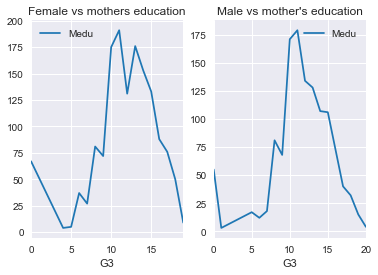

In [47]:
# maybe go bxxxx
fig, ax = plt.subplots(1, 2)

student_df = studentsall[['sex','Medu','G3']]
student_female = student_df[student_df['sex'] == 'F']
student_female.groupby(['G3']).sum().plot(ax=ax[0], title="Female vs mothers education")

student_male = student_df[student_df['sex'] == 'M']
student_male.groupby(['G3']).sum().plot(ax=ax[1], title="Male vs mother's education")

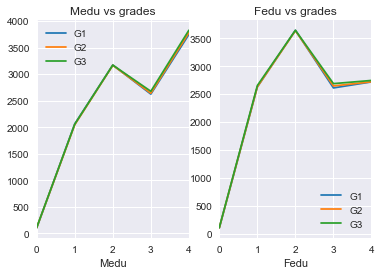

In [48]:
## lets focus over support for education now from parents / school
## using Medu / Fedu field here to show impact of this over performance
##

fig, ax = plt.subplots(1, 2)

student_Medu = studentsall[['Medu', 'G1', 'G2', 'G3']]
student_Medu.groupby(['Medu']).sum().plot(ax=ax[0], legend=True, title="Medu vs grades")

student_Fedu = studentsall[['Fedu', 'G1', 'G2', 'G3']]
student_Fedu.groupby(['Fedu']).sum().plot(ax=ax[1], legend=True, title="Fedu vs grades")

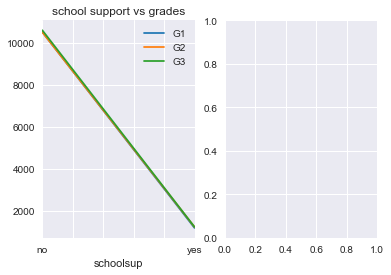

In [49]:
## lets focus over support for education now from parents / school
## using school support field here to show impact of this over performance


fig, ax  = plt.subplots(1, 2)

student_sup = studentsall[['schoolsup', 'G1', 'G2', 'G3']]
student_sup.groupby(['schoolsup']).sum().plot(ax=ax[0], title="school support vs grades")

#urban_df = urban_data[['schoolsup', 'G1', 'G2', 'G3']]
#urban_df.groupby(['schoolsup']).sum().plot(ax=ax[1], title="school support vs grades")

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import scipy

Mean squared error: 14.32
Variance score: 0.04


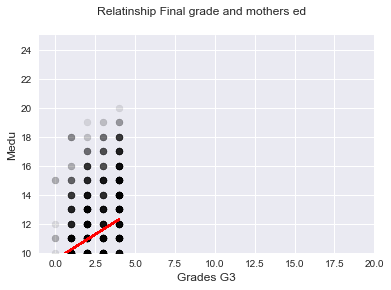

In [51]:
y = students_with_dummies2['G3']
X = students_with_dummies2['Medu']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
fig = plt.figure()
plt.scatter(X,y, color='black', alpha=.1)
fig.suptitle('Relatinship Final grade and mothers ed', fontsize=12)
plt.xlabel('Grades G3', fontsize=12)
plt.ylabel('Medu', fontsize=12)
plt.xlim(-1, 20)
plt.ylim(10, 25)
plt.plot(X,y_pred, color='red')
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((linreg.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(X, y))

In [52]:
students_with_dummies2.head()

,age,Medu,Fedu,reason,traveltime,studytime,failures,famsup,nursery,higher,...,Fjob_teacher,guardian_father,guardian_mother,guardian_other,internet_no,internet_yes,subject_M,subject_P,paid_no,paid_yes
0,18,4,4,course,2,2,0,no,yes,yes,...,1,0,1,0,1,0,1,0,1,0
1,17,1,1,course,1,2,0,yes,no,yes,...,0,1,0,0,0,1,1,0,1,0
2,15,1,1,other,1,2,3,no,yes,yes,...,0,0,1,0,0,1,1,0,0,1
3,15,4,2,home,1,3,0,yes,yes,yes,...,0,0,1,0,0,1,1,0,0,1
4,16,3,3,home,1,2,0,yes,yes,yes,...,0,1,0,0,1,0,1,0,0,1


In [61]:
# TASK 2: define variables as the features and grade3 as the response
feature_cols = ['Medu','paid_yes','paid_no']
#X = studentsall[feature_cols]
#y = studentsall.G3
X = students_with_dummies2[feature_cols]
y = students_with_dummies2.G3

In [62]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [63]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [41]:
#Train-Test split
from sklearn.model_selection import train_test_split
data = students_with_dummies2.drop('G3', 1)
label = students_with_dummies2.G3
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

In [42]:
# see next workbook for rest of this
# wonder if I can see a decision tree
# Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

ValueError: could not convert string to float: 'yes'

In [40]:
from io import StringIO
from sklearn.tree import export_graphviz

out = StringIO()
tree.export_graphviz(dt, out_file = out)
# OUTPUT DOT LANGUAGE SCRIPTS
print(out.getvalue())

AttributeError: 'NoneType' object has no attribute 'children_left'